# Context

The "Data Science Salaries" dataset provides valuable insights into the compensation trends and variations in the field of data science from 2020 to 2023. This dataset encompasses a comprehensive collection of salary information from various industries, organizations, and geographic regions, enabling data professionals, researchers, and organizations to analyze and understand the prevailing salary landscape in the data science domain during this four-year period. By examining this dataset, one can gain a deeper understanding of the factors influencing data science salaries, such as job roles, experience levels, educational backgrounds, and geographical locations. The dataset serves as a valuable resource for individuals seeking career guidance, companies aiming to benchmark their compensation strategies, and researchers investigating the evolving dynamics of the data science job market

The dataset includes information about Job Title, Employment Type, Experience Level, Expertise Level, Salary, Salary Currency, Company Location, Salary in USD, Employee Residence, Company Size, and Year. This information provides a comprehensive view of job-related details, compensation levels, company characteristics, and temporal aspects, offering valuable insights for analyzing and understanding the dataset.

# Data Dictionary

📌 Job Title: The title or position of the job.

📌 Employment Type: The type of employment, such as full-time, part-time, contract, etc.

📌 Experience Level: The level of experience required for the job, e.g., entry-level, mid-level, senior, etc.

📌 Expertise Level: The level of expertise or skill required for the job, e.g., junior, intermediate, expert, etc.

📌 Salary: The salary amount associated with the job.

📌 Salary Currency: The currency in which the salary is provided.

📌 Company Location: The location of the company where the job is based.

📌 Salary in USD: The salary amount converted to United States Dollars (USD) if the original salary is in a different currency.

📌 Employee Residence: The location where the employee resides.

📌 Company Size: The size of the company, often categorized by the number of employees.

📌 Year: The year in which the job information is recorded.

# Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
%cd C:\Users\purvi\Downloads

C:\Users\purvi\Downloads


In [3]:
df = pd.read_csv('v5_Latest_Data_Science_Salaries.csv')

In [4]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


In [5]:
#Checking the dataset shape
df.shape

(3951, 11)

In [6]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


In [7]:
#Statistical Summary
df.describe()

,Salary,Salary in USD,Year
count,"3,951.00","3,951.00","3,951.00"
mean,"198,290.04","142,753.11","2,022.58"
std,"672,530.97","68,281.39",0.68
min,"14,000.00","15,000.00","2,020.00"
25%,"95,000.00","92,280.00","2,022.00"
50%,"140,000.00","136,600.00","2,023.00"
75%,"189,875.00","185,000.00","2,023.00"
max,"30,400,000.00","450,000.00","2,023.00"


In [8]:
#Checking the null values 
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [9]:
#Checking if there is any duplicate value present or not?
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [10]:
#Job Title : The title or position of the job
df["Job Title"].nunique()

120

In [11]:
#Top 10 job title
top_10_job_title = df["Job Title"].value_counts()[:10]
top_10_job_title

Job Title
Data Engineer                803
Data Scientist               731
Data Analyst                 542
Machine Learning Engineer    362
Analytics Engineer           161
Research Scientist           120
Data Architect                93
Research Engineer             76
ML Engineer                   74
Data Science Manager          68
Name: count, dtype: int64

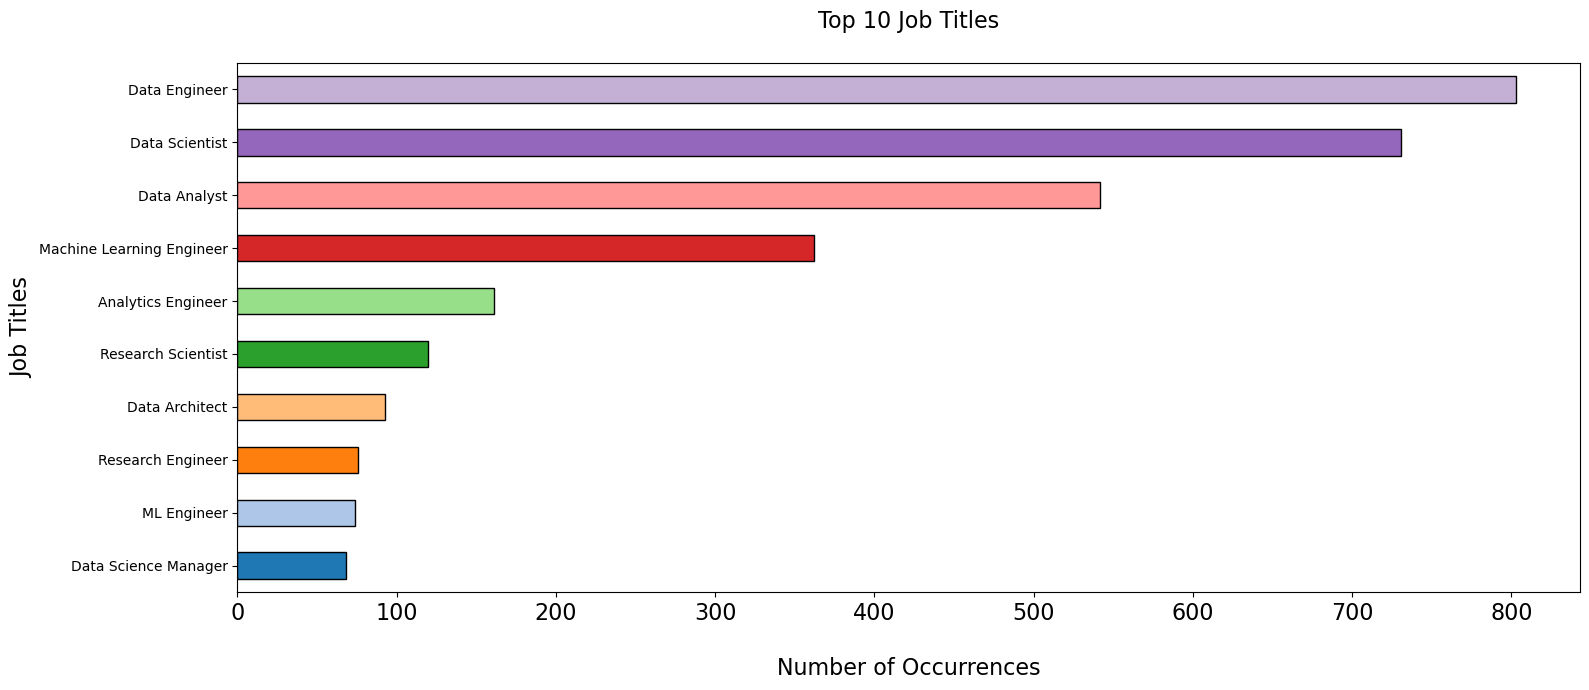

In [12]:
#Plotting top 10 jon titles
plt.figure(figsize = (16, 7))
top_10_job_title.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Job Titles', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Top 10 Job Titles\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

Insights - The diversity of job titles within the data science and analytics field, with "Data Engineer," "Data Scientist," and "Data Analyst" being the most prominent roles. It also underscores the importance of specialized positions and the evolving nature of the industry, driven by emerging technologies like machine learning and computer vision.

In [13]:
#Employment Type
df["Employment Type"].value_counts()

Employment Type
Full-Time    3909
Contract       18
Part-Time      13
Freelance      11
Name: count, dtype: int64

Text(0.5, 1.0, 'Employment Type')

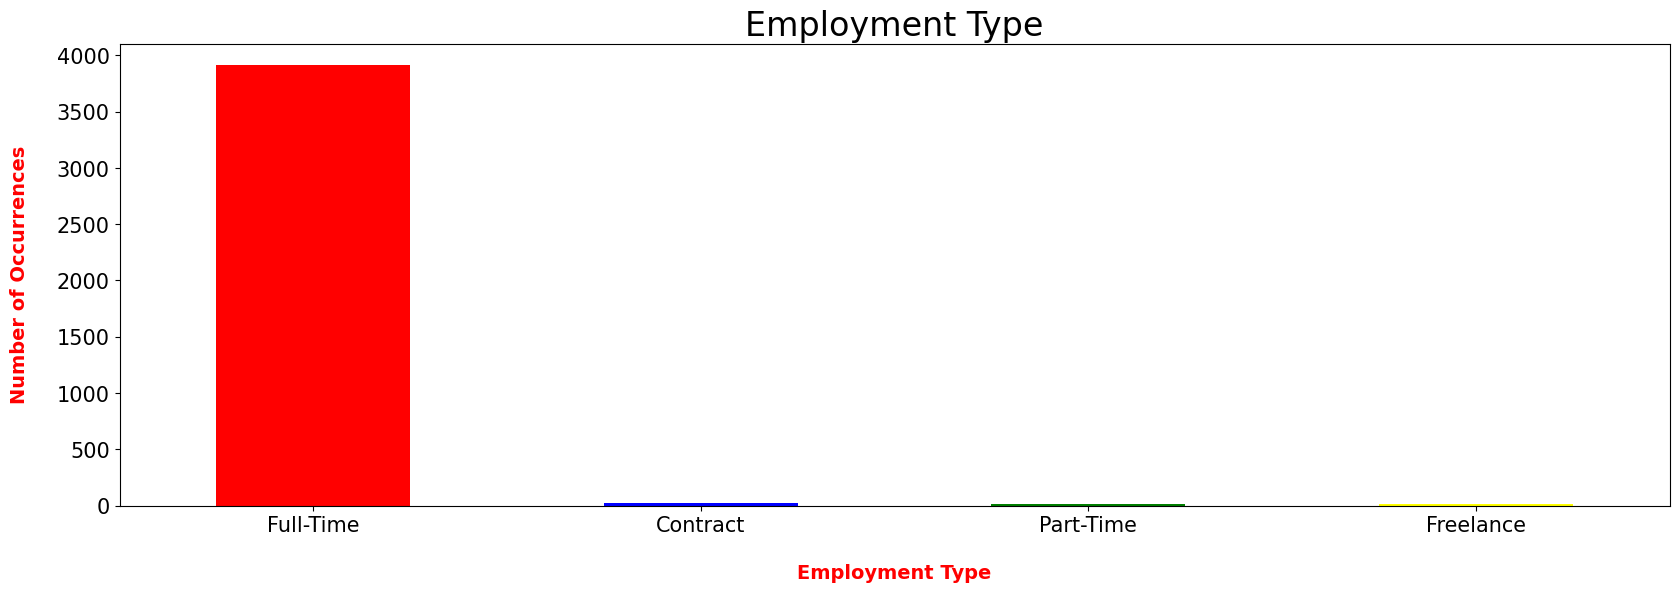

In [14]:
colors = ['red','blue' ,'green' , 'yellow']

plt.figure(figsize = (20, 6))
ax = df["Employment Type"].value_counts().plot(kind = 'bar', color = colors , rot = 0)

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20);
plt.title('Employment Type' , fontsize = 24)

Note:

Full-Time: 3,909 individuals are employed in a standard, full-time capacity, typically working 35-40 hours per week.

Contract: 18 individuals are engaged under a contractual agreement, usually for specific projects or defined time periods.

Part-Time: 13 individuals work fewer hours than full-time employees, often with flexible schedules and limited benefits.

Freelance: 11 individuals work independently on a project-by-project basis without being tied to a single employer.

This data gives an overview of the diverse employment types represented in the dataset

In [15]:
#Experience Level
df['Experience Level'].value_counts()

Experience Level
Senior       2493
Mid           954
Entry         330
Executive     174
Name: count, dtype: int64

Text(0.5, 1.0, 'Experience Level')

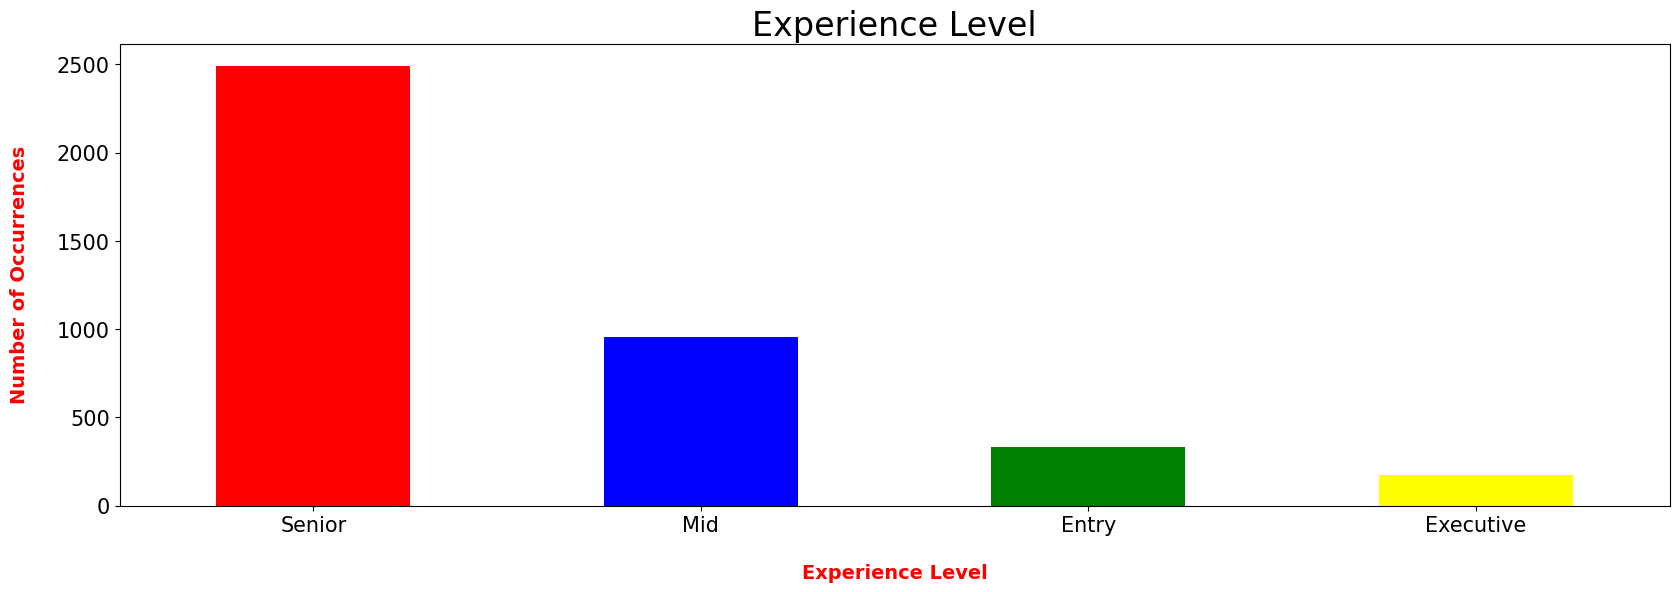

In [16]:
colors = ['red','blue' ,'green' , 'yellow']

plt.figure(figsize = (20, 6))
ax = df["Experience Level"].value_counts().plot(kind = 'bar', color = colors , rot = 0)

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Experience Level', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20);
plt.title('Experience Level' , fontsize = 24)

Note:

Senior: The dataset includes 2,493 individuals classified as senior-level professionals. These individuals typically have substantial experience and expertise in their respective fields.

Mid: There are 954 individuals categorized as mid-level professionals. This group likely represents individuals with moderate experience who have progressed beyond entry-level roles.

Entry: The dataset contains 330 individuals classified as entry-level professionals. These individuals are likely in the early stages of their careers, gaining foundational experience in their respective fields.

Executive: There are 174 individuals designated as executives in the dataset. These individuals are likely in high-ranking leadership positions within their organizations.

This breakdown provides valuable insights into the composition of experience levels within the dataset. It suggests a diverse range of professionals, including senior experts, mid-level contributors, entry-level newcomers, and executive leaders, contributing to the dataset's diversity in terms of career stages and expertise levels.

In [17]:
#Expertise Level: 
df["Expertise Level"].value_counts()

Expertise Level
Expert          2493
Intermediate     954
Junior           330
Director         174
Name: count, dtype: int64

Text(0.5, 1.0, 'Expertise Level')

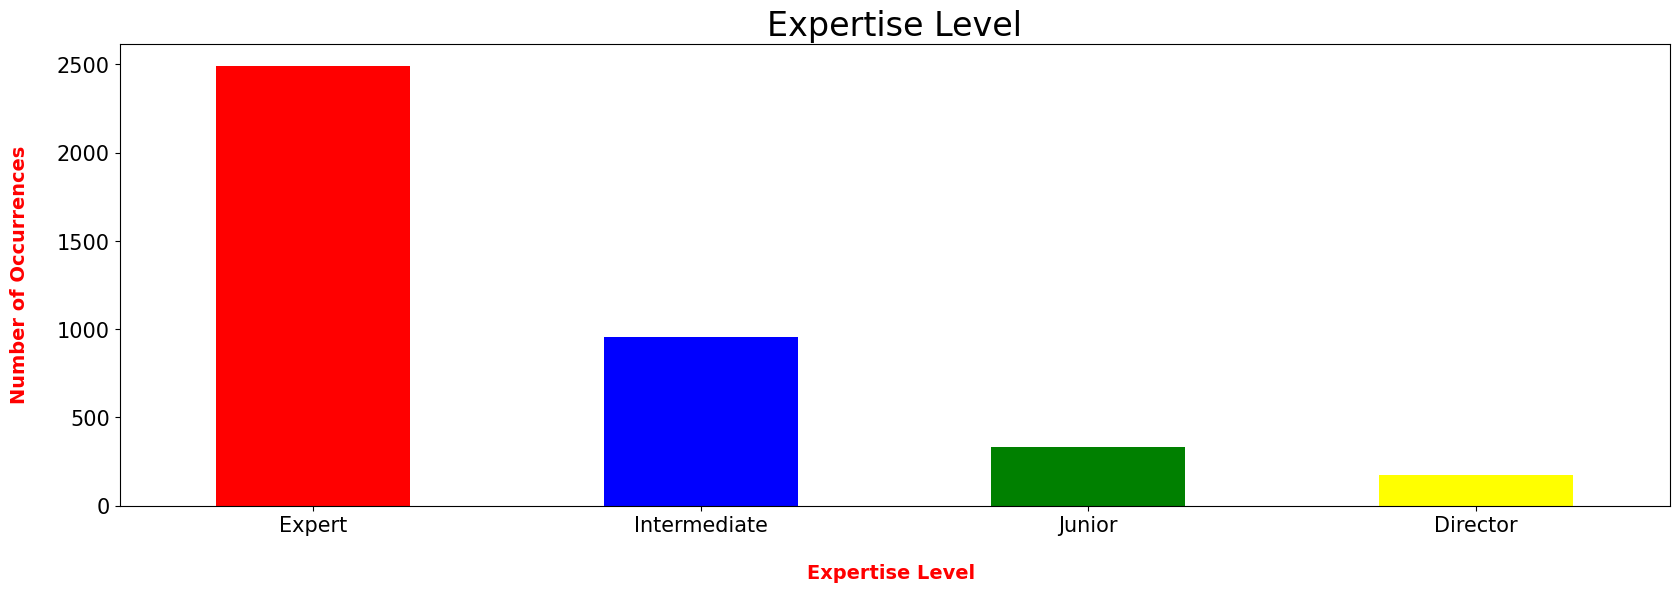

In [18]:
colors = ['red','blue' ,'green' , 'yellow']

plt.figure(figsize = (20, 6))
ax = df["Expertise Level"].value_counts().plot(kind = 'bar', color = colors , rot = 0)

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Expertise Level ', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20);
plt.title('Expertise Level' , fontsize = 24)

Note:

Expert: There are 2,493 individuals classified as experts, indicating a high level of expertise in their respective fields.

Intermediate: 954 individuals are categorized as intermediate, suggesting a moderate level of expertise.

Junior: 330 individuals are classified as junior, signifying individuals in the early stages of their expertise development.

Director: 174 individuals hold the title of director, indicating high-ranking leadership roles in their organizations.

This expertise level breakdown complements the experience level information and provides further insights into the diversity of skills and roles within the dataset.

In [19]:
#Company Size
df["Company Size"].value_counts()

Company Size
Medium    3309
Large      479
Small      163
Name: count, dtype: int64

Text(0.5, 1.0, 'Company Size')

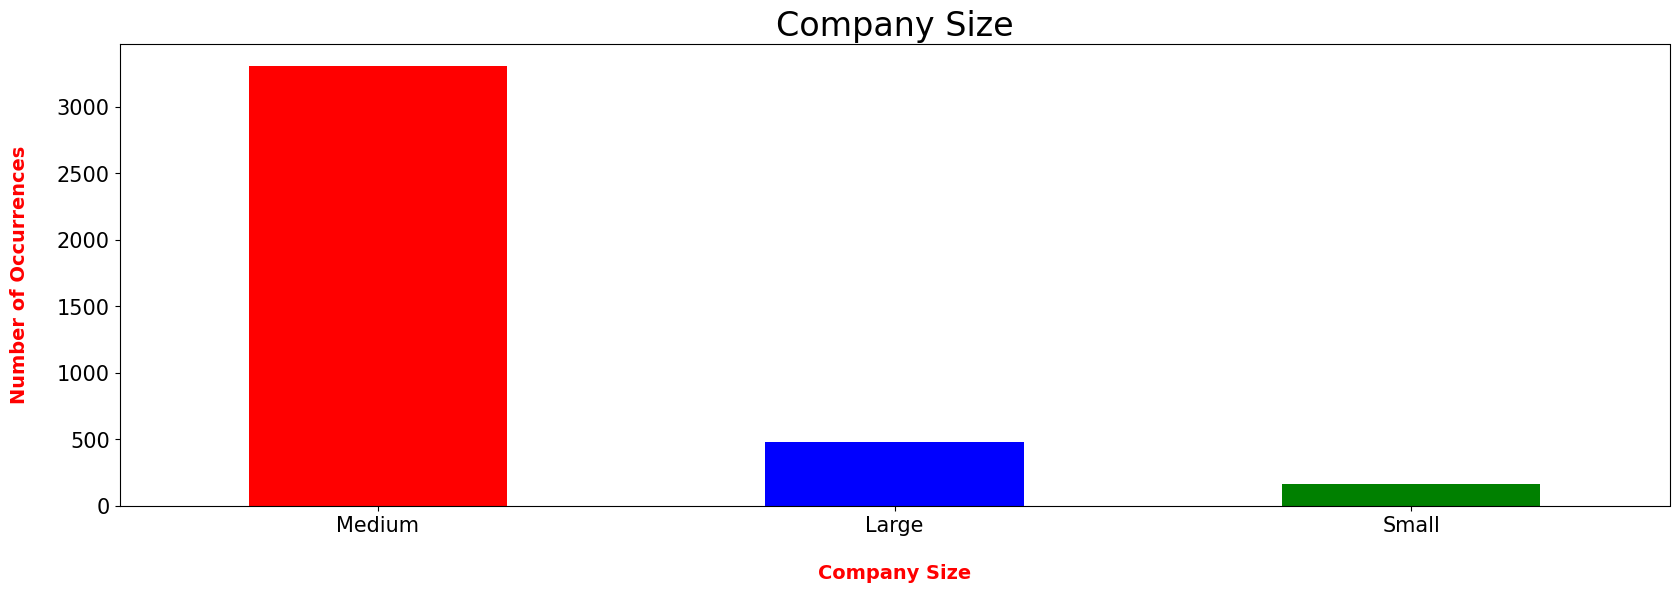

In [20]:
colors = ['red','blue' ,'green' , 'yellow']

plt.figure(figsize = (20, 6))
ax = df["Company Size"].value_counts().plot(kind = 'bar', color = colors , rot = 0)

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Company Size', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20);
plt.title('Company Size' , fontsize = 24)

Note:

Medium: There are 3,309 individuals working in medium-sized companies, which often indicates a substantial workforce and organizational scale.

Large: 479 individuals are employed by large companies, suggesting significant corporate entities with extensive resources.

Small: 163 individuals are part of small companies, typically characterized by a more intimate work environment and fewer employees.

This company size breakdown provides insights into the variety of organizational scales and work environments represented in the dataset.

In [21]:
#Year: The year in which the job information is recorded.
df['Year'].value_counts()

Year
2023    2642
2022    1020
2021     215
2020      74
Name: count, dtype: int64

Text(0.5, 1.0, 'Year')

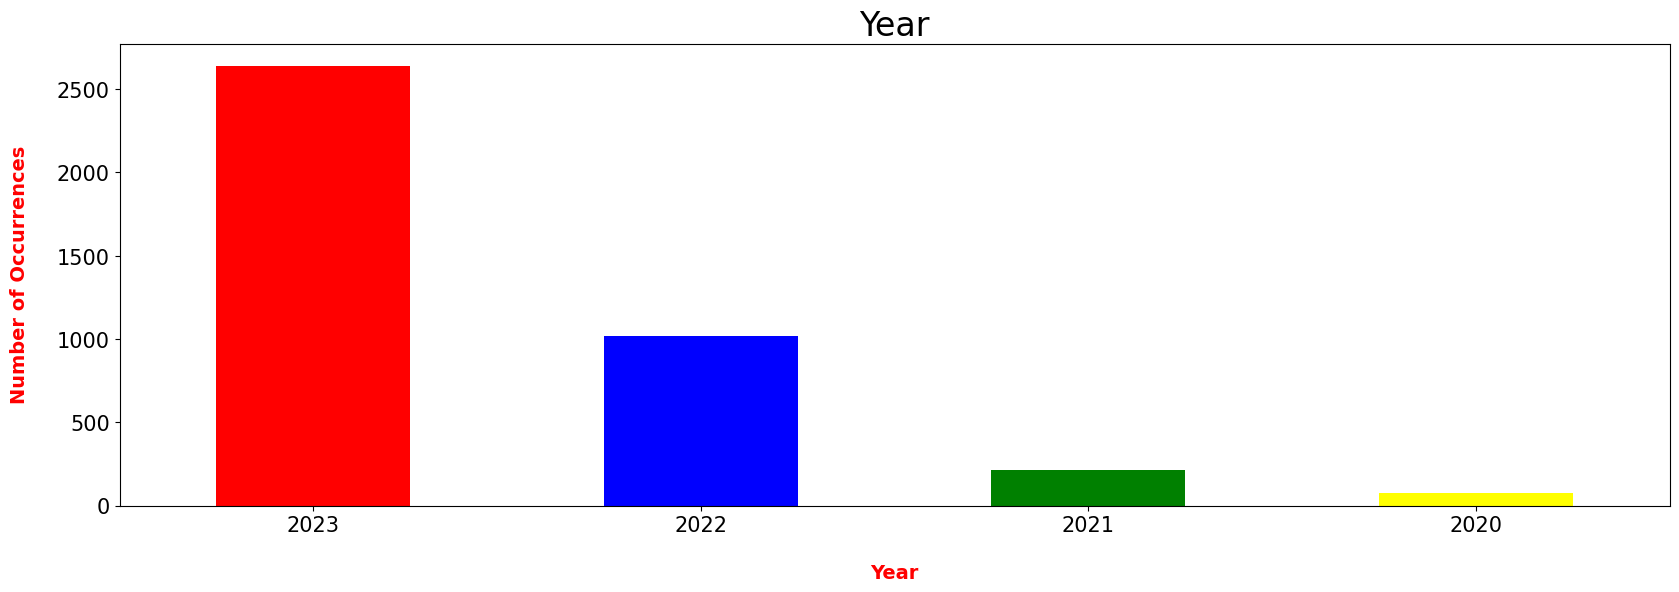

In [22]:
colors = ['red','blue' ,'green' , 'yellow']

plt.figure(figsize = (20, 6))
ax = df["Year"].value_counts().plot(kind = 'bar', color = colors , rot = 0)

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Year', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20);
plt.title('Year' , fontsize = 24)

Note:

2023: There are 2,642 data entries for the year 2023.

2022: There are 1,020 data entries for the year 2022.

2021: There are 215 data entries for the year 2021.

2020: There are 74 data entries for the year 2020.

This breakdown provides insights into the distribution of data entries across different years within the dataset.

# Question. What are the median salaries for Indians in different positions related to Data Science and Machine Learning?

In [23]:
median_salary_indian_ds = df[(df['Job Title'] == 'Data Scientist') & (df['Employee Residence'] == 'India')]['Salary in USD'].median()
print(f"The median salary for Indians in the Data Scientist position amounts to: ${median_salary_indian_ds:.2f}")

median_salary_indian_mle = df[(df['Job Title'] == 'Machine Learning Engineer') & (df['Employee Residence'] == 'India')]['Salary in USD'].median()
print(f"The median salary for Indians in the Machine Learning Engineer position amounts to: ${median_salary_indian_mle:.2f}")

median_salary_indian_da = df[(df['Job Title'] == 'Data Analyst') & (df['Employee Residence'] == 'India')]['Salary in USD'].median()
print(f"The median salary for Indians in the Data Analyst position amounts to: ${median_salary_indian_da:.2f}")

median_salary_indian_de = df[(df['Job Title'] == 'Data Engineer') & (df['Employee Residence'] == 'India')]['Salary in USD'].median()
print(f"The median salary for Indians in the Data Engineer position amounts to: ${median_salary_indian_de:.2f}")

The median salary for Indians in the Data Scientist position amounts to: $31159.00
The median salary for Indians in the Machine Learning Engineer position amounts to: $22663.00
The median salary for Indians in the Data Analyst position amounts to: $18788.50
The median salary for Indians in the Data Engineer position amounts to: $26032.50


# Question. What is the average salary?
# Question. What is the median salary in the dataset ?
# Question. What is the highest salary in the dataset ?
# Question. What is the lowest salary in the dataset ?

In [24]:
mean = round(df["Salary in USD"].mean())
print(f"Mean Salary in the Dataset: ${mean}")

median = round(df["Salary in USD"].median())
print(f"Median Salary in the Dataset: ${median}")

maximum = round(df["Salary in USD"].max())
print(f"Highest Salary in the Dataset: ${maximum}")

minimun = round(df["Salary in USD"].min())
print(f"Lowest Salary in the Dataset: ${minimun}")

Mean Salary in the Dataset: $142753
Median Salary in the Dataset: $136600
Highest Salary in the Dataset: $450000
Lowest Salary in the Dataset: $15000


# Question. Find the top 10 countries with the highest median salary.

In [25]:
top_10_countries_highest_median_salary = df.groupby('Employee Residence')['Salary in USD'].median().nlargest(10)
print("Top_10_countries_highest_median_salary")
top_10_countries_highest_median_salary = top_10_countries_highest_median_salary.sort_values(ascending = True)
top_10_countries_highest_median_salary

Top_10_countries_highest_median_salary


Employee Residence
Bosnia and Herzegovina   120,000.00
New Zealand              125,000.00
China                    125,404.00
Canada                   125,962.00
Saudi Arabia             134,999.00
United States            150,000.00
Puerto Rico              160,000.00
Malaysia                 200,000.00
Qatar                    300,000.00
Israel                   417,937.00
Name: Salary in USD, dtype: float64

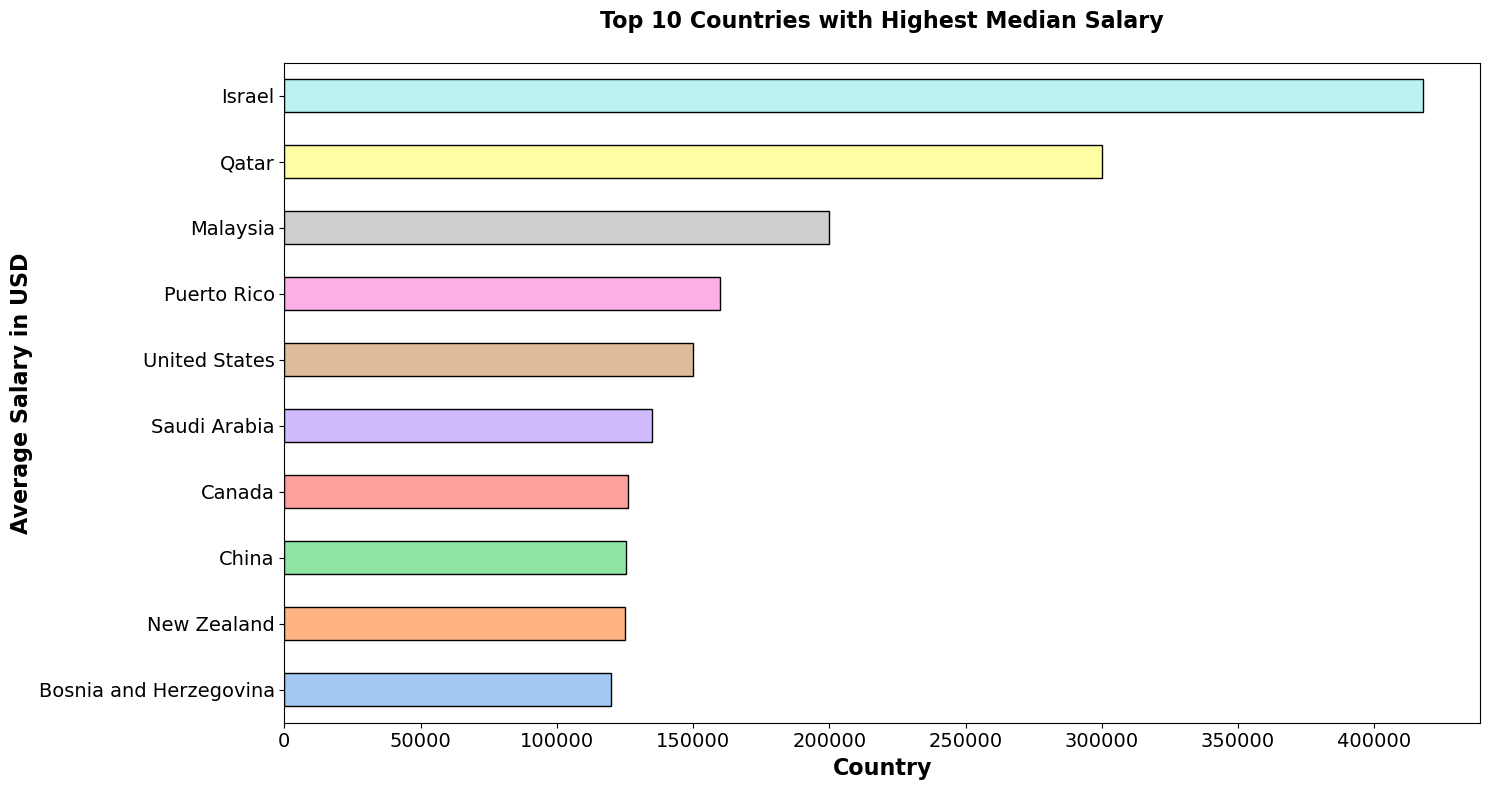

In [26]:
plt.figure(figsize = (15,8))
top_10_countries_highest_median_salary.plot(kind = 'barh', color = sns.color_palette('pastel'), edgecolor = 'black', fontsize = 14)
plt.xlabel('Country', fontsize = 16, weight = 'bold')
plt.ylabel('Average Salary in USD', fontsize = 16, weight = 'bold')
plt.title('Top 10 Countries with Highest Median Salary\n', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 14)
plt.tight_layout()
plt.show()

# Question. Find the top 10 countries with the lowest median salary.

In [27]:
top_10_countries_lowest_median_salary = df.groupby('Employee Residence')['Salary in USD'].median().nsmallest(10)
print("Top_10_countries_with_the_least_median_salary")
top_10_countries_lowest_median_salary = top_10_countries_lowest_median_salary.sort_values(ascending = False)
top_10_countries_lowest_median_salary

Top_10_countries_with_the_least_median_salary


Employee Residence
Denmark      28,609.00
Malta        28,369.00
Peru         27,000.00
Thailand     26,957.00
Serbia       25,532.00
Turkey       25,000.00
Costa Rica   20,000.00
Honduras     20,000.00
Ecuador      16,000.00
Indonesia    15,000.00
Name: Salary in USD, dtype: float64

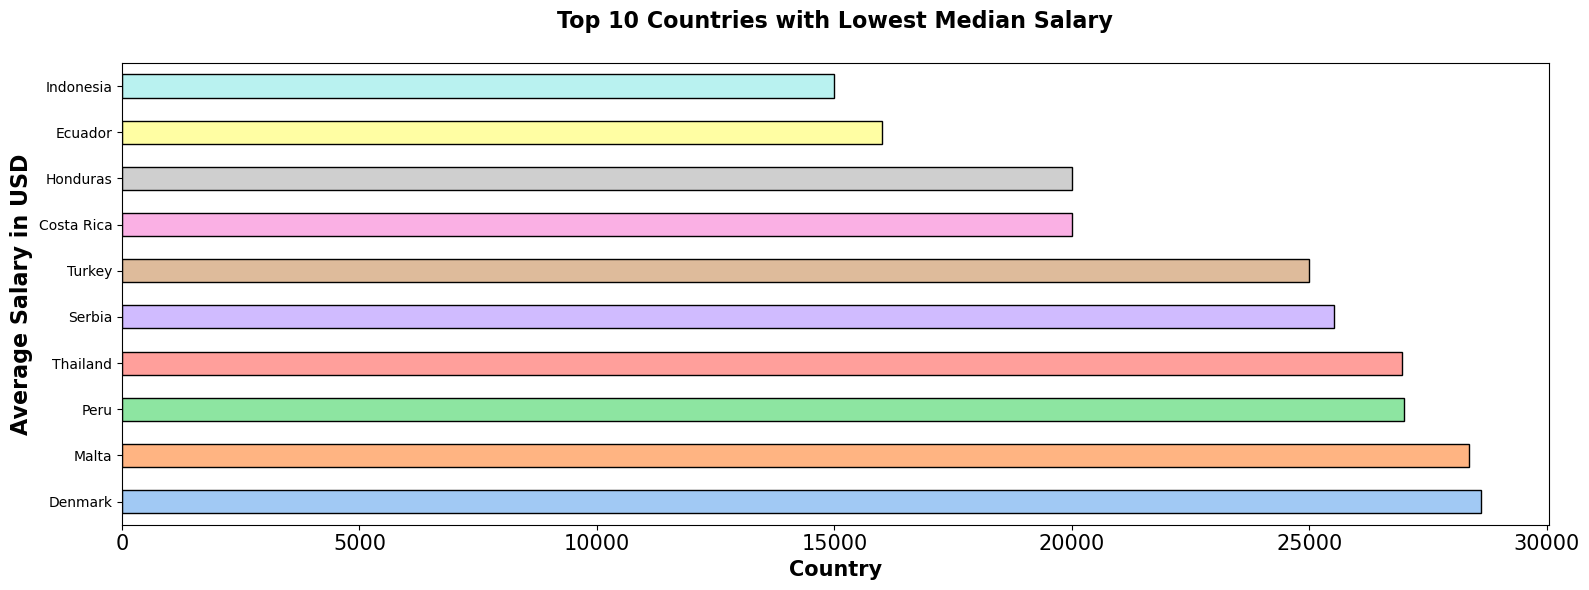

In [28]:
plt.figure(figsize = (16, 6))
top_10_countries_lowest_median_salary.plot(kind = 'barh', color = sns.color_palette('pastel'), edgecolor = 'black')
plt.xlabel('Country', fontsize = 15 , weight = 'bold')
plt.ylabel('Average Salary in USD', fontsize = 16, weight = 'bold')
plt.title('Top 10 Countries with Lowest Median Salary\n', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 15)
plt.tight_layout()
plt.show()

# Question. Median salary for each company size.

In [29]:
median_salary_by_company_size = df.groupby('Company Size')['Salary in USD'].median()
print("Median salary for each company size:")
print(median_salary_by_company_size)

Median salary for each company size:
Company Size
Large    100,800.00
Medium   143,000.00
Small     75,000.00
Name: Salary in USD, dtype: float64


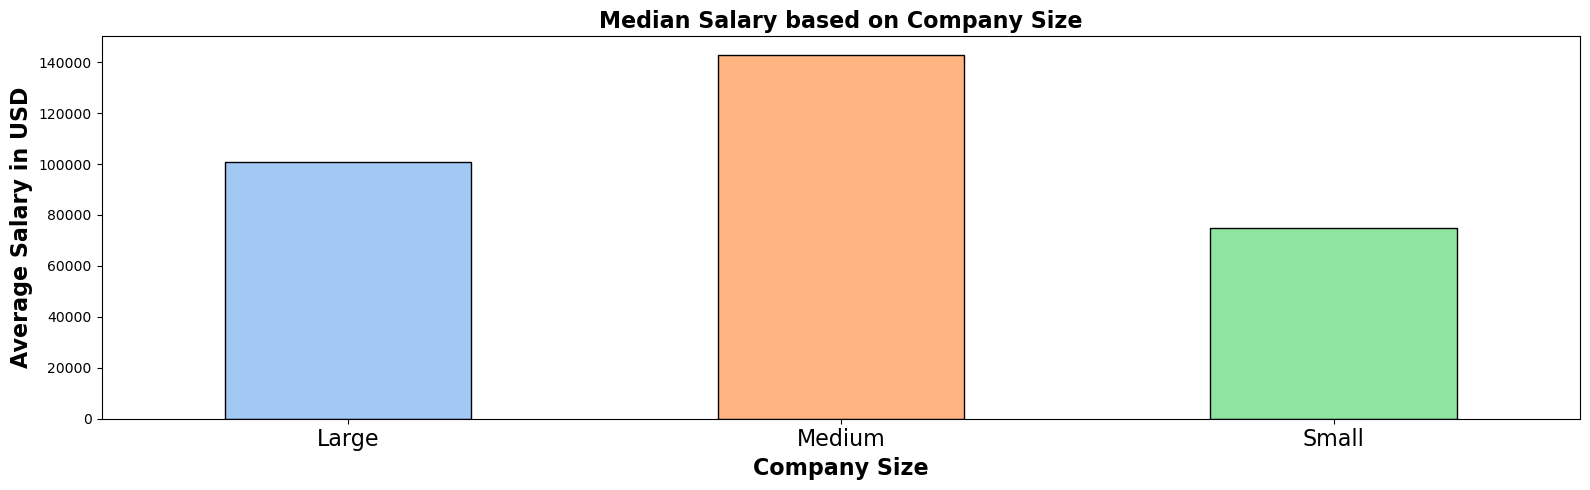

In [30]:
plt.figure(figsize = (16, 5))
median_salary_by_company_size.plot(kind = 'bar', color = sns.color_palette('pastel'), edgecolor = 'black')
plt.xlabel('Company Size', fontsize = 16, weight = 'bold')
plt.ylabel('Average Salary in USD', fontsize = 16, weight = 'bold')
plt.title('Median Salary based on Company Size', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# Question. Are there any significant differences in salaries based on employment type (Full-Time, Part-Time, etc.)?

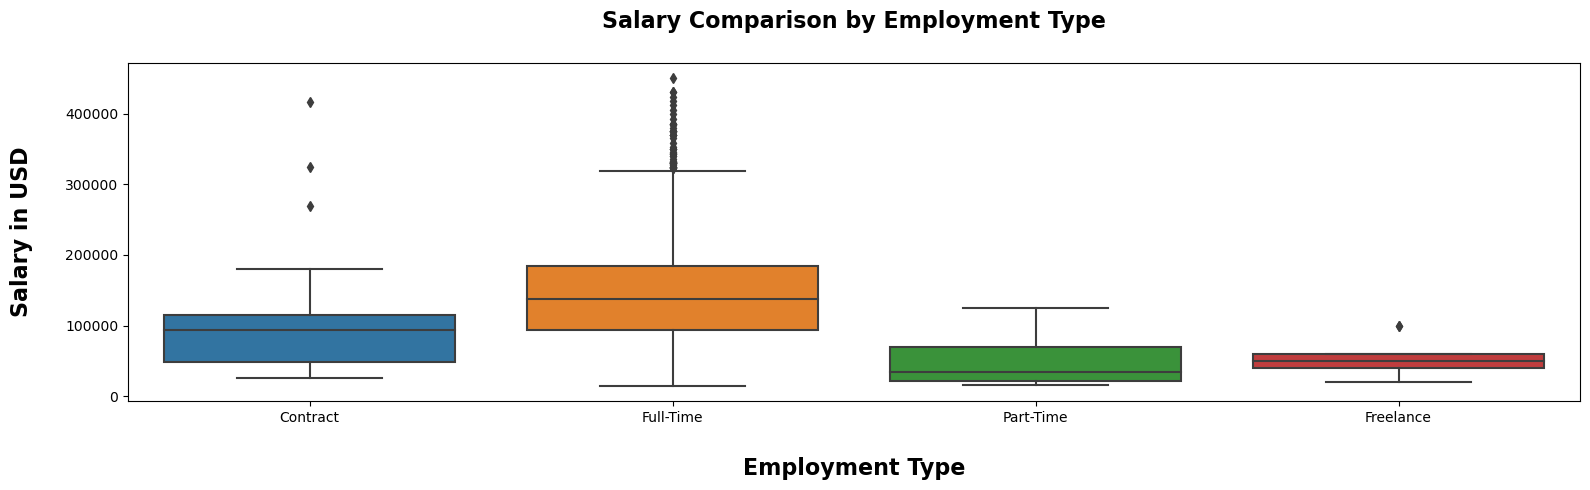

In [31]:
# Create a box plot to compare salaries by employment type

plt.figure(figsize = (16, 5))
sns.boxplot(x = 'Employment Type', y = 'Salary in USD', data = df)
plt.xlabel('\nEmployment Type', fontsize = 16, weight = 'bold')
plt.ylabel('Salary in USD\n', fontsize = 16, weight = 'bold')
plt.title('Salary Comparison by Employment Type\n', fontsize = 16, weight = 'bold')
plt.tight_layout()
plt.show()

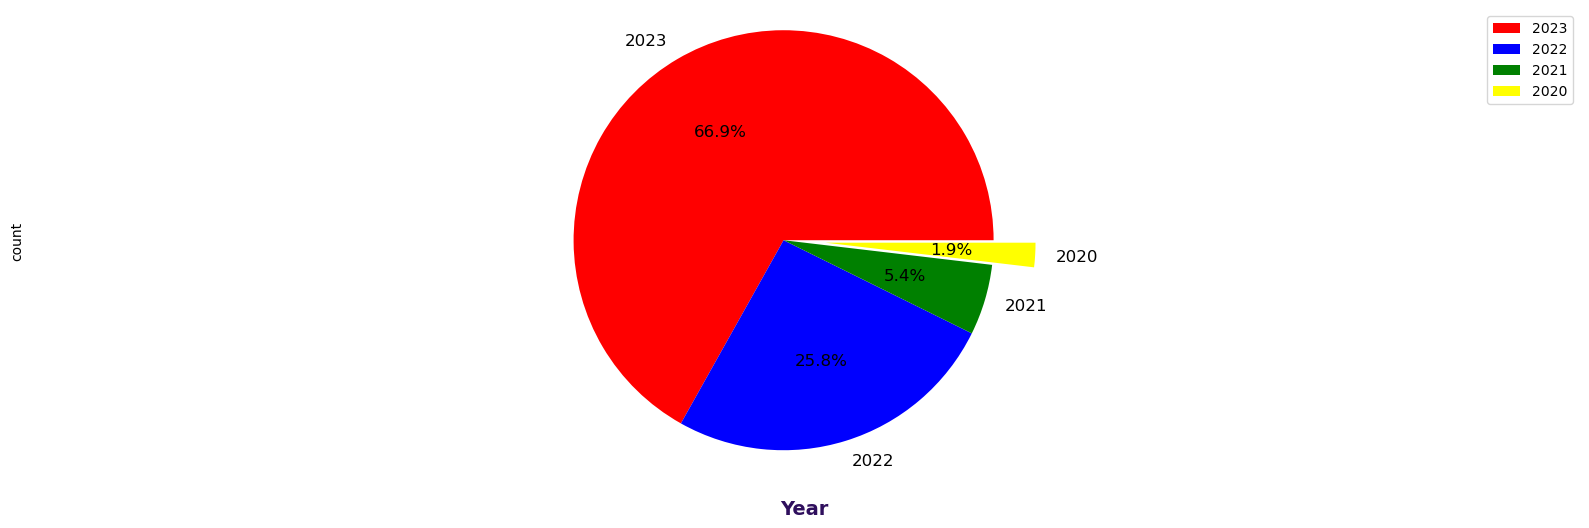

In [32]:
plt.figure(figsize = (20, 6))

counts = df["Year"].value_counts()
explode = (0, 0, 0, 0.2)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Year', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Note:

The data distribution across different years reveals clear trends within the dataset. The majority of the data entries are from the year 2023 (66.9%) , indicating a strong emphasis on current information. Additionally, the dataset includes a significant representation from the year 2022 (25.8%), highlighting its historical coverage. While 2021 (5.4%) and 2020 (1.9%) contribute to a lesser extent, they provide valuable insights into previous years. This distribution enables comprehensive analyses, allowing for a deeper understanding of trends, changes, and shifts in the dataset over time.

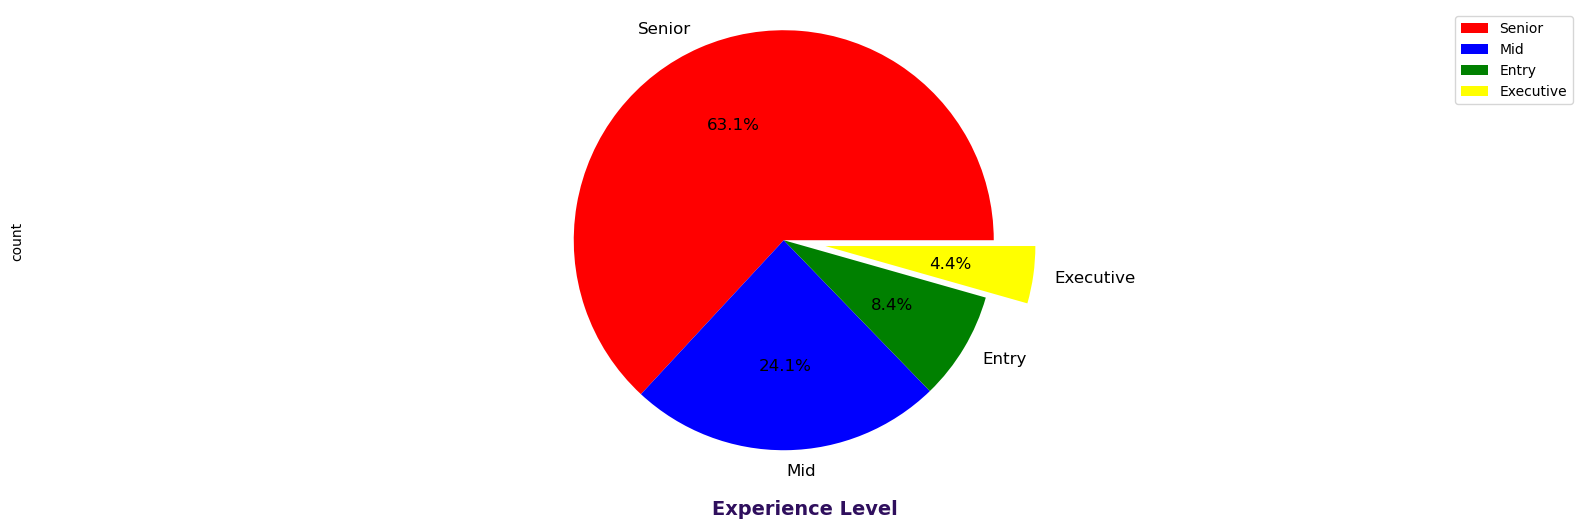

In [35]:
plt.figure(figsize = (20, 6))

counts = df["Experience Level"].value_counts()
explode = (0, 0, 0, 0.2)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Experience Level', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Note:

The data distribution across different years reveals clear trends within the dataset. The majority of the data entries are from the year 2023 (66.9%) , indicating a strong emphasis on current information. Additionally, the dataset includes a significant representation from the year 2022 (25.8%), highlighting its historical coverage. While 2021 (5.4%) and 2020 (1.9%) contribute to a lesser extent, they provide valuable insights into previous years. This distribution enables comprehensive analyses, allowing for a deeper understanding of trends, changes, and shifts in the dataset over time.

# Question. How many employees work in Canada?

In [37]:
Indian_employees = df[df['Employee Residence'] == 'India']
num_Indian_employees = len(Indian_employees)
print(f'Number of employees in india: {num_Indian_employees}')

Number of employees in india: 63


# Question. What is the median salary for Entry-level positions?

In [38]:
median_junior_salary = df[df['Experience Level'] == 'Entry']['Salary in USD'].median()
print(f'Median salary for Junior-level positions: {median_junior_salary}')

Median salary for Junior-level positions: 70000.0


# Question. What is the most common salary currency in the dataset?

In [39]:
common_currency = df['Salary Currency'].mode()[0]
print(f'Most common salary currency: {common_currency}')

Most common salary currency: United States Dollar


# Question. What is the total salary expenditure in 2023?

In [40]:
total_salary_2023 = df[df['Year'] == 2023]['Salary in USD'].sum()
print(f'Total salary expenditure in 2023: {total_salary_2023:.2f} USD')

Total salary expenditure in 2023: 401433884.00 USD


# Question. How many employees are in Small companies and have Expert-level expertise?

In [41]:
small_expert_employees = df[(df['Company Size'] == 'Small') & (df['Expertise Level'] == 'Expert')]
num_small_expert_employees = len(small_expert_employees)
print(f'Number of employees in Small companies with Expert-level expertise: {num_small_expert_employees}')

Number of employees in Small companies with Expert-level expertise: 50


# Question. What is the highest salary in the dataset and which job title corresponds to it?

In [42]:
highest_salary = df['Salary in USD'].max()
job_title_highest_salary = df[df['Salary in USD'] == highest_salary]['Job Title'].values[0]
print(f'Highest salary: {highest_salary} USD (Job Title: {job_title_highest_salary})')

Highest salary: 450000 USD (Job Title: Research Scientist)


# Question. What is the total salary expenditure in Euro for employees in Italy?

In [43]:
total_salary_italy_euro = df[(df['Company Location'] == 'Italy') & (df['Salary Currency'] == 'Euro')]['Salary in USD'].sum()
print(f'Total salary expenditure in Euro for employees in Italy: {total_salary_italy_euro:.2f} USD')

Total salary expenditure in Euro for employees in Italy: 649962.00 USD


# Question. What is the average salary for employees who work in companies with Small and Medium sizes?

In [44]:
avg_salary_small_medium = df[df['Company Size'].isin(['Small', 'Medium'])]['Salary in USD'].mean()
print(f'Average salary for employees in Small and Medium-sized companies: {avg_salary_small_medium:.2f} USD')

Average salary for employees in Small and Medium-sized companies: 146431.95 USD


# Question. What is the percentage of employees who work in Large-sized companies?

In [45]:
percentage_large_companies = (len(df[df['Company Size'] == 'Large']) / len(df)) * 100
print(f'Percentage of employees in Large-sized companies: {percentage_large_companies:.2f}%')

Percentage of employees in Large-sized companies: 12.12%


# Question. What is the salary range for Machine Learning Engineers in the United States?

In [46]:
ml_engineer_us_salary_range = df[(df['Job Title'] == 'Machine Learning Engineer') & (df['Company Location'] == 'United States')]['Salary in USD'].agg(['min', 'max'])
print(f'Salary range for Machine Learning Engineers in the United States:{ ml_engineer_us_salary_range}')

Salary range for Machine Learning Engineers in the United States:min     81000
max    392000
Name: Salary in USD, dtype: int64


In [47]:
from IPython.display import Image
Image(url="https://i.imgur.com/d55Kzgv.png")

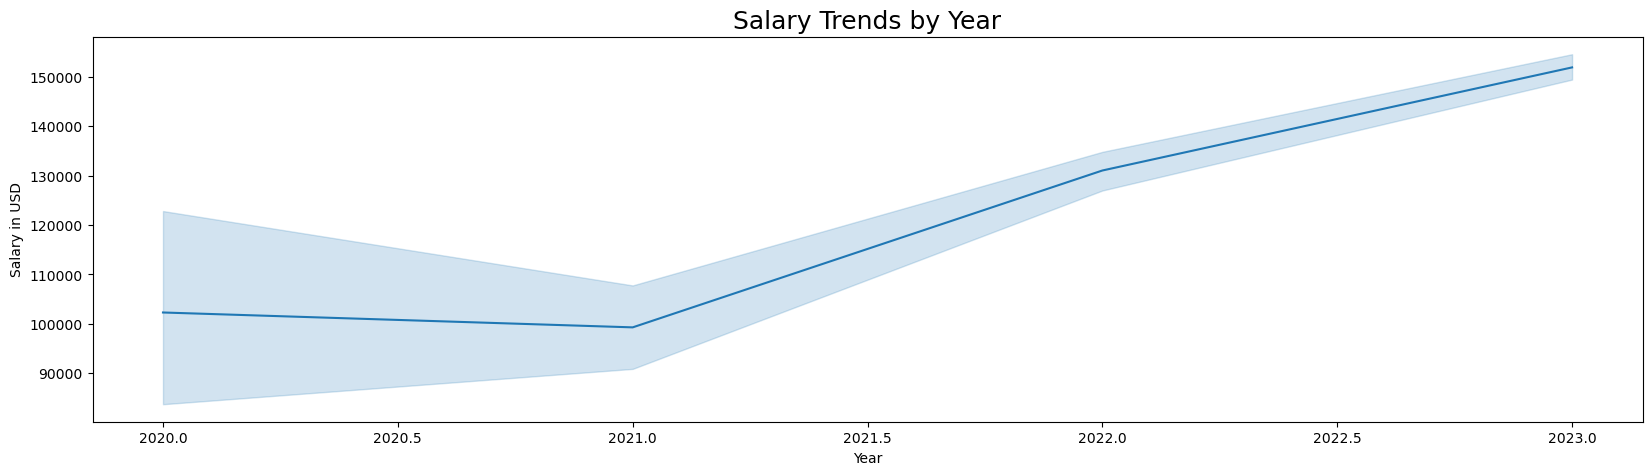

In [48]:
# Line plot for Salary by Year
plt.figure(figsize = (20, 5))
sns.lineplot(x='Year', y='Salary in USD', data = df)
plt.title('Salary Trends by Year',fontsize = 18)
plt.show()

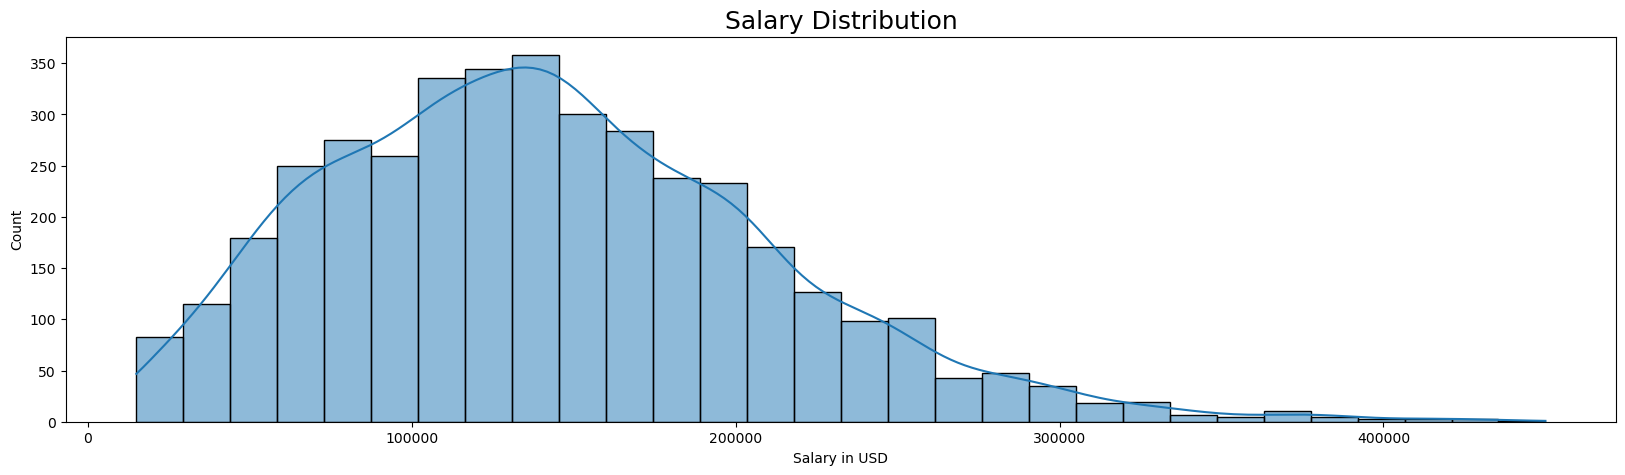

In [49]:
# Histogram for Salary distribution
plt.figure(figsize = (20, 5))
sns.histplot(df['Salary in USD'], bins=30, kde=True)
plt.title('Salary Distribution',fontsize = 18)
plt.xlabel('Salary in USD')
plt.show()

Insights:

The histogram provides an overview of the distribution of salaries in USD.

the overall distribution of salaries in the dataset and identifying patterns or anomalies in the salary values.

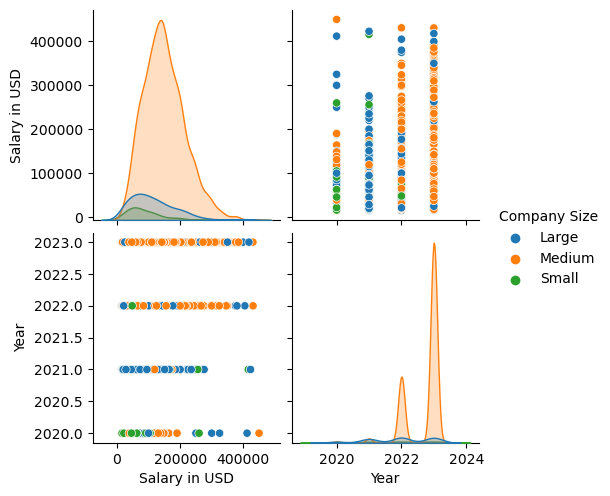

In [50]:
# Pair plot for numerical columns
sns.pairplot(df[['Salary in USD', 'Year', 'Company Size']], hue='Company Size')
plt.show();

Insights:

Scatterplots in the upper and lower triangles show how 'Salary in USD' relates to 'Year'. This can help identify trends or patterns in salary changes over different years.

Histograms on the diagonal provide insights into the distribution of 'Salary in USD'.

The scatterplots differentiate data points based on 'Company Size'. This helps observe how the relationships between variables differ for various company sizes.

The scatterplots can indicate whether there is a correlation between variables.

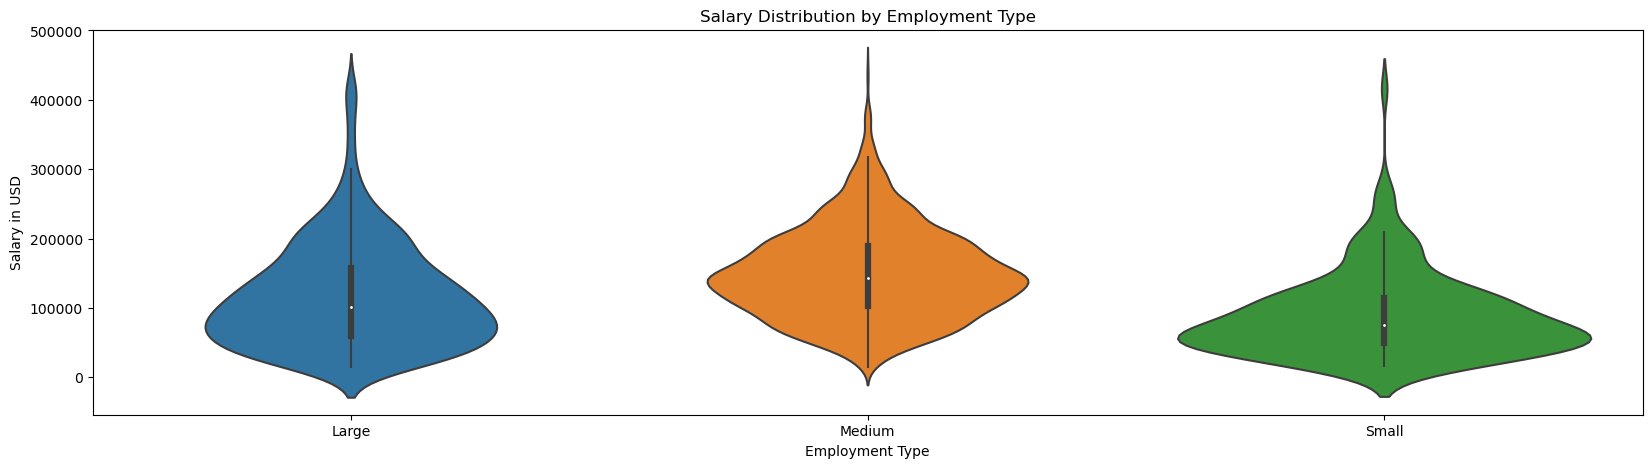

In [53]:
# voilin plot for Salary distribution by Employment Type
plt.figure(figsize=(20, 5))
sns.violinplot(x='Company Size', y='Salary in USD', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

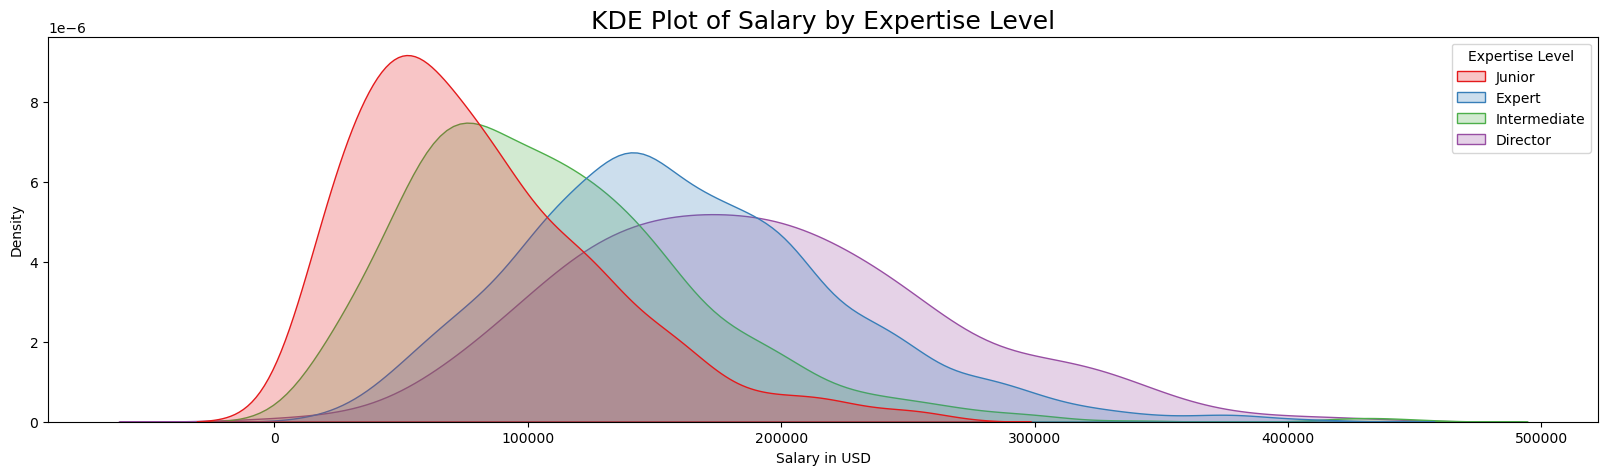

In [51]:
# KDE plot for Salary distribution by Expertise Level
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='Salary in USD', hue='Expertise Level', common_norm=False, fill=True, palette='Set1')
plt.title('KDE Plot of Salary by Expertise Level',fontsize=18)
plt.xlabel('Salary in USD')
plt.show()

# Question. What is the Highest Salaries by Employment Type?

In [54]:
idx_max_salary_by_employment = df.groupby('Employment Type')['Salary in USD'].idxmax()

# Extract the job title and salary for each highest salary record
highest_salaries_by_employment = df.loc[idx_max_salary_by_employment, ['Employment Type', 'Job Title', 'Salary in USD']]

print("Highest Salaries by Employment Type:")
print(highest_salaries_by_employment)

Highest Salaries by Employment Type:
     Employment Type                  Job Title  Salary in USD
3879        Contract   Principal Data Scientist         416000
2988       Freelance  Machine Learning Engineer         100000
3736       Full-Time         Research Scientist         450000
3109       Part-Time               Data Analyst         125404


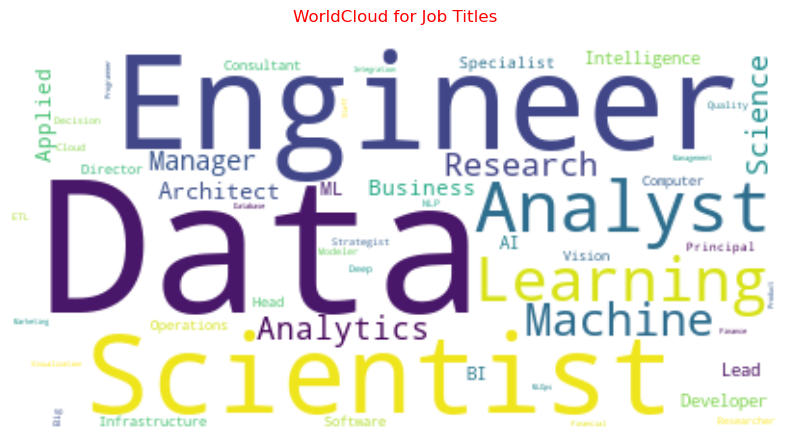

In [55]:
#Wordcloud for jobtitle

text = " ".join(title for title in df["Job Title"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()

Insights:

The word cloud visually represents the frequency of words in job titles.

Words that appear larger in the cloud are more frequent in the job titles.

Common terms or specific words that stand out in the job titles can be easily identified.

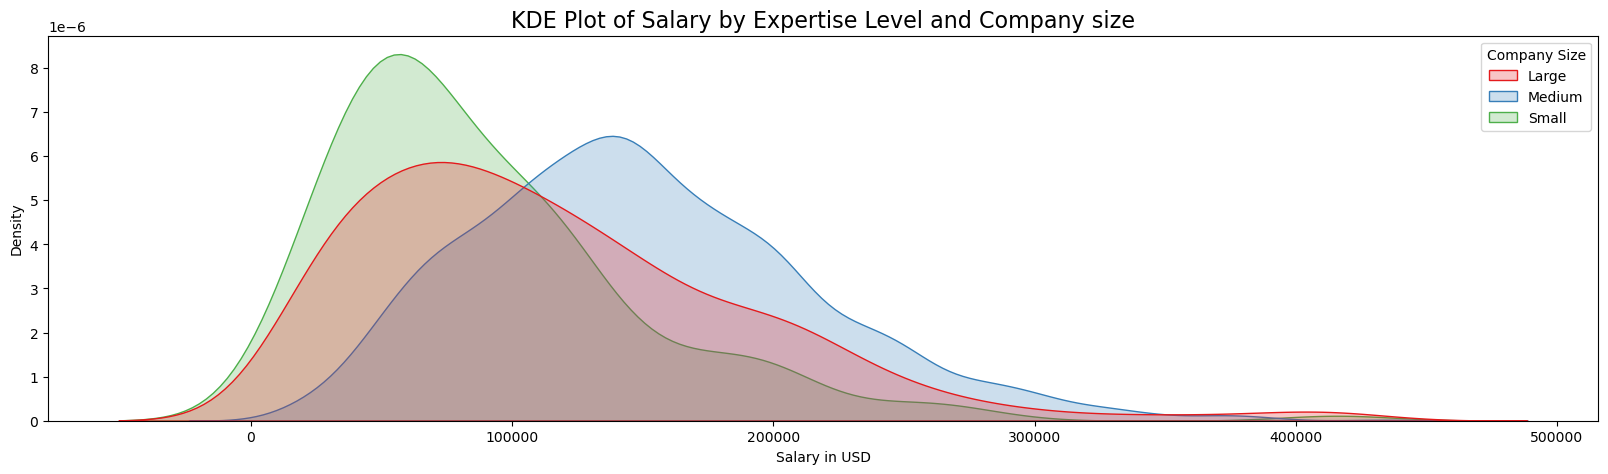

In [57]:
# KDE plot for Salary distribution by Expertise Level and company size
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='Salary in USD', hue='Company Size', common_norm=False, fill=True, palette='Set1')
plt.title('KDE Plot of Salary by Expertise Level and Company size' , fontsize=16)
plt.xlabel('Salary in USD')
plt.show()

Insights:

The KDE plot visually represents the probability density of salaries for different expertise levels across company sizes.

The filled areas under the curves show the regions of higher probability density for salary values.

Peaks and troughs in the plot indicate where salary values are more or less likely to occur.

Color differentiation based on 'Company Size' allows for a comparison of salary distributions across different sizes of companies.

This type of plot is useful for understanding the overall shape and variations in the salary distribution within the dataset.



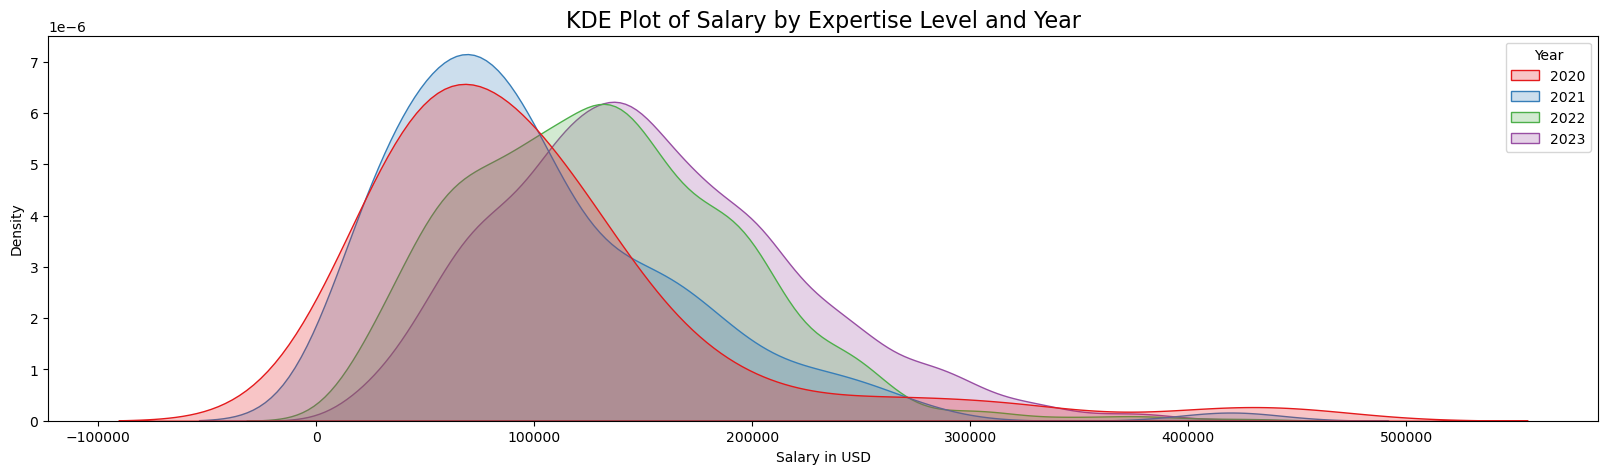

In [58]:
# KDE plot for Salary distribution by Expertise Level and Year
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='Salary in USD', hue='Year', common_norm=False, fill=True, palette='Set1')
plt.title('KDE Plot of Salary by Expertise Level and Year' ,fontsize=16)
plt.xlabel('Salary in USD')
plt.show()

Insights:

The KDE plot visually represents the probability density of salaries for different expertise levels across years.

The filled areas under the curves show the regions of higher probability density for salary values.

Peaks and troughs in the plot indicate where salary values are more or less likely to occur.

Color differentiation based on the 'Year' allows for a year-wise comparison of salary distributions.

This type of plot is useful for understanding the overall shape and variations in the salary distribution within the dataset.

In [59]:
df["Salary Currency"].value_counts()

Salary Currency
United States Dollar      3347
Euro                       252
British Pound Sterling     213
Indian Rupee                50
Canadian Dollar             34
Australian Dollar           10
Polish Zloty                 7
Singapore Dollar             6
Swiss Franc                  5
Brazilian Real               4
Japanese Yen                 4
Danish Krone                 3
Turkish Lira                 3
Hungarian Forint             3
Thai Baht                    2
Norwegian Krone              2
Israeli New Shekel           1
Hong Kong Dollar             1
South African Rand           1
Philippine Peso              1
Mexican Peso                 1
Chilean Peso                 1
Name: count, dtype: int64

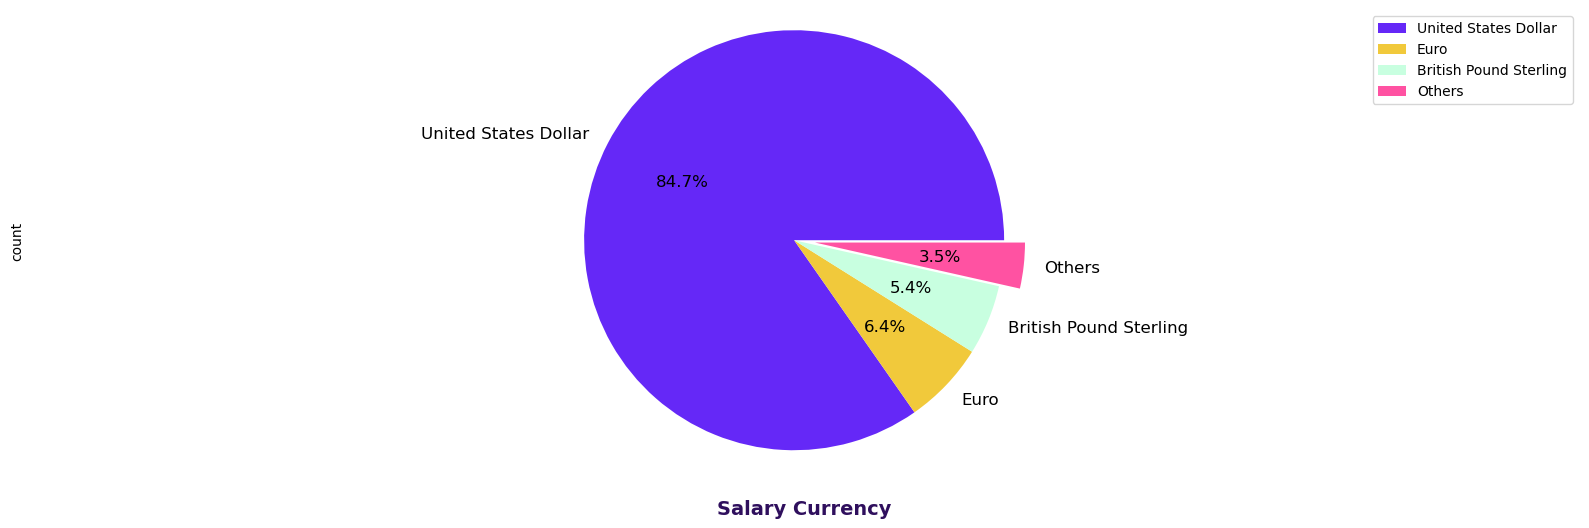

In [60]:
plt.figure(figsize=(20, 6))
currency_counts = df["Salary Currency"].value_counts()

top_count = 3
top_currencies = currency_counts.head(top_count)

other_count = currency_counts.shape[0] - top_count
other_sum = currency_counts.iloc[top_count:].sum()
top_currencies['Others'] = other_sum

colors = ["#6528F7", "#F1C93B", "#C8FFE0", "#FF52A2", "#F48484", "#F0DE36"]

explode = [0.1 if i == "Others" else 0 for i in top_currencies.index]

top_currencies.plot(kind = 'pie',
                    fontsize = 12,
                    colors = colors,
                    explode = explode,
                    autopct = '%1.1f%%')
plt.xlabel('Salary Currency', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=top_currencies.index, loc="best")
plt.show()

Insights

This chart provides a visual representation of the distribution of salary currencies, with emphasis on the top currencies and a combined category for the rest.

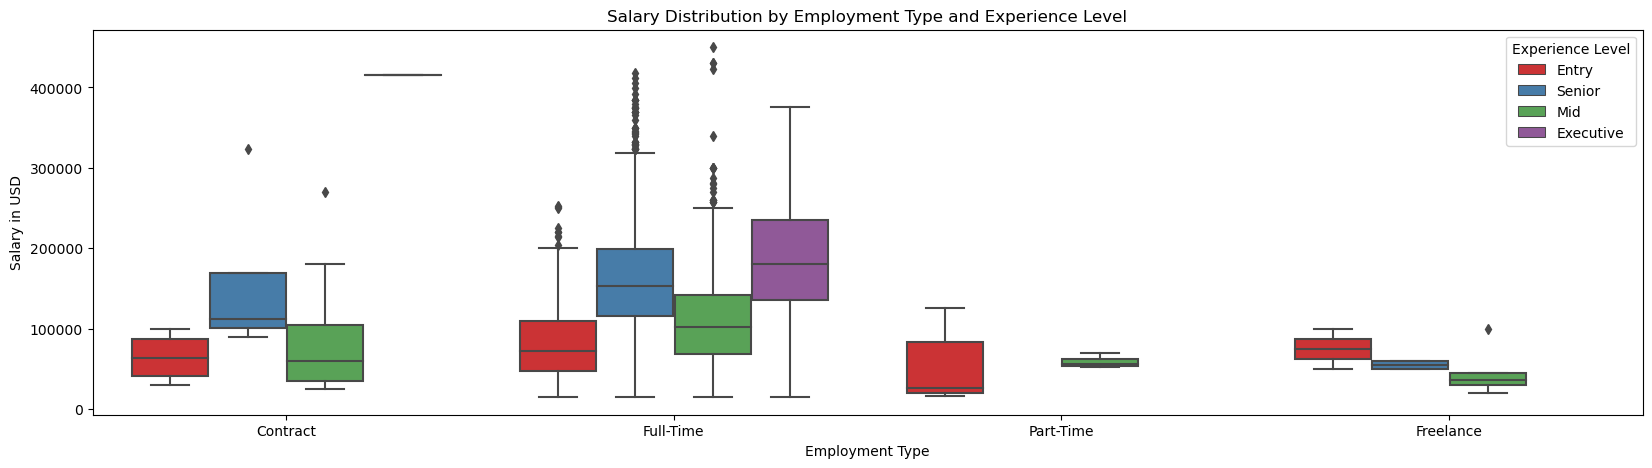

In [61]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Employment Type', y='Salary in USD', hue='Experience Level', palette='Set1')
plt.title('Salary Distribution by Employment Type and Experience Level')
plt.xticks(rotation=0)
plt.show()

Insights:

The boxplot provides a summary of the salary distribution for each combination of Employment Type and Experience Level.

The boxes represent the interquartile range (IQR), with the central line inside the box indicating the median salary.

Whiskers extend to show the range of salaries within 1.5 times the IQR.

Outliers, individual data points beyond the whiskers, can be identified.

By incorporating the hue 'Experience Level', the plot allows for a more detailed comparison of salary distributions within each Employment Type category based on experience levels.

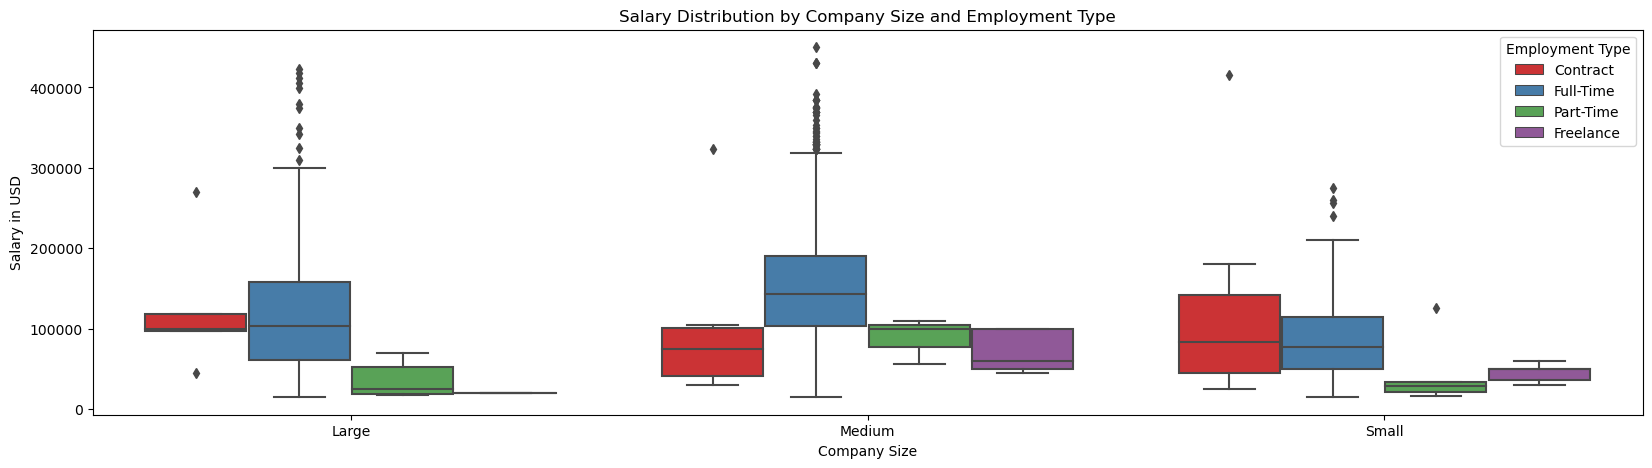

In [62]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Company Size', y='Salary in USD', hue='Employment Type', palette='Set1')
plt.title('Salary Distribution by Company Size and Employment Type')
plt.xticks(rotation=0)
plt.show()

Insights:

The boxplot provides insights into the salary distribution, highlighting the central tendency, spread, and any potential outliers across different company sizes and employment types.

The hue parameter separates the data based on the 'Employment Type', allowing for a direct comparison of salary distributions for different types of employment (e.g., Full-Time, Part-Time, Contract).

The line inside each box represents the median salary for the corresponding category. The box itself represents the interquartile range (IQR), with the upper and lower edges of the box indicating the first and third quartiles.

The whiskers extend to the minimum and maximum values within a certain range (usually 1.5 times the IQR). Points beyond the whiskers are considered outliers and are plotted individually.

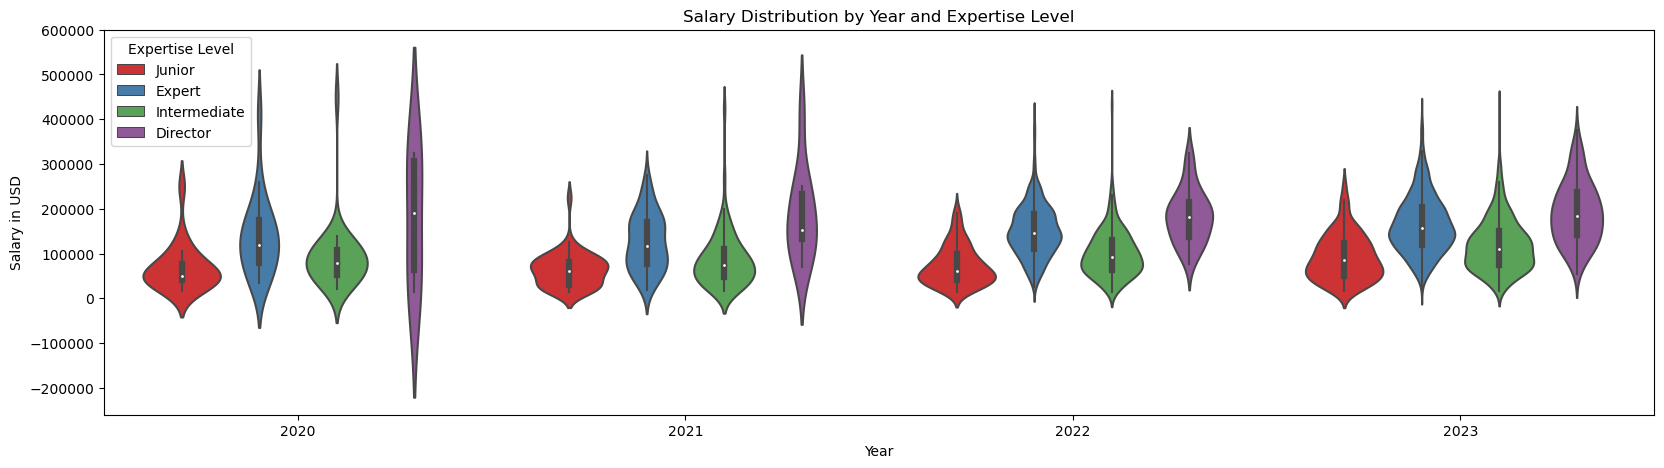

In [63]:
plt.figure(figsize=(20, 5))
sns.violinplot(data=df, x='Year', y='Salary in USD', hue='Expertise Level', palette='Set1')
plt.title('Salary Distribution by Year and Expertise Level')
plt.xticks(rotation=0)
plt.show()

Insights:

The plot separates the data based on the 'Year' column, indicating how salaries are distributed across different years.T

he violin plot provides a combination of a box plot and a kernel density plot, offering insights into the distribution of salaries for different years and expertise levels.

The width of the violin plots represents the density or frequency of salary values at different points. A wider section indicates a higher concentration of salaries at that level.

The white dot within each violin plot represents the median salary for the corresponding expertise level and year. The width of the plot at a specific salary level indicates the density of data points around that value.

Any points beyond the "whiskers" of the violin plot can be considered outliers.

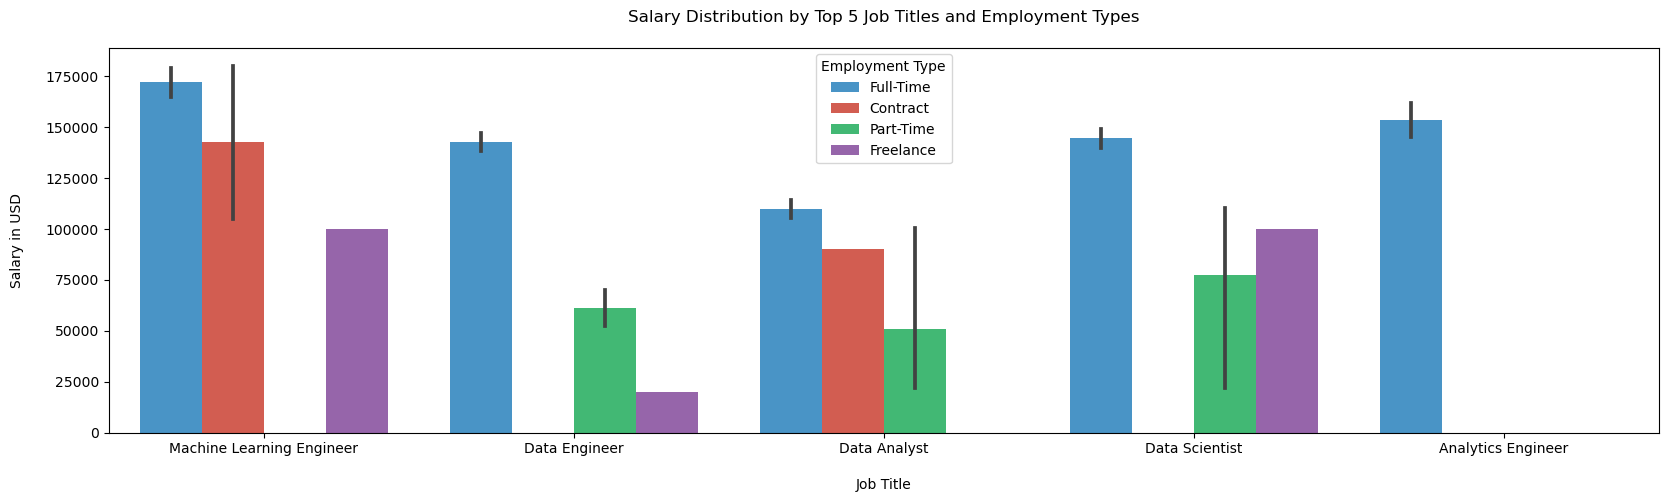

In [64]:
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6", "#f1c40f"]
sns.set_palette(custom_palette)

top_job_titles = df['Job Title'].value_counts().head(5).index

top_employment_types = df['Employment Type'].value_counts().head(5).index

filtered_df = df[(df['Job Title'].isin(top_job_titles)) & (df['Employment Type'].isin(top_employment_types))]

plt.figure(figsize = (20, 5))
sns.barplot(data = filtered_df, x = 'Job Title', y = 'Salary in USD', hue = 'Employment Type')
plt.xlabel('\nJob Title')
plt.ylabel('Salary in USD\n')
plt.title('Salary Distribution by Top 5 Job Titles and Employment Types\n')
plt.xticks(rotation = 0)
plt.legend(title = 'Employment Type')
plt.show()

Insights:

The plot provides a visual representation of the salary distribution for the top 5 job titles.

Each bar represents a job title, and the bars are grouped by employment type, showing salary differences within each job title category.

The custom color palette enhances the visual appeal of the plot, making it easier to distinguish between different job titles and employment types.

This plot is useful for quickly comparing salary distributions across different job titles and employment types.